In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from sklearn.neighbors import KNeighborsClassifier

### Get fit data ready

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=399999):
    try:
        data = pd.read_csv(given_fname,index_col=False,engine='python',nrows=lim)
        data.to_csv(output_fname)
    except:
        content = []
        count = 1

        with open(given_fname, 'r') as fr:
            for line in fr:
                if count <= lim:
                    #print(type(line), line)
                    content.append(line)
                    count += 1
        with open(output_fname, 'w') as fw:
            for line in content:
                # print(type(line), line)
                fw.write(line)

        data = pd.read_csv(output_fname, index_col=False,encoding= res_encoding,engine='python')

    return data

In [3]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
qso_train_drop = qso_train_partial[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
qso_train_drop = qso_train_drop[(qso_train_drop['r_LSST_magerr']>0.2)&(qso_train_drop['i_LSST_magerr']>0.2)]
redshifts26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 22.0]
redshifts26 = redshifts26[redshifts26['z_LSST_mag'] < 26.0]
redshifts26 = redshifts26['z']
qso_train_drop = qso_train_drop.drop(columns=['z', 'r_LSST_magerr', 'i_LSST_magerr'])
print('qso_train_catalog_z.csv partial data description: ')
qso_train_drop.describe()

qso_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000
mean,28.576193,26.616020,24.340320,24.201112,24.264969,24.132527
std,1.218340,1.654428,2.009015,2.089360,2.112093,2.108081
min,26.672280,23.064283,18.489759,17.989148,17.800595,17.633615
25%,27.689657,25.314514,23.136710,22.977195,23.069490,22.937156
50%,28.366448,26.540555,24.371926,24.306130,24.363508,24.192066
75%,29.189413,27.668971,25.789820,25.697926,25.766767,25.595761
max,38.902328,36.769079,32.115011,32.168396,32.742341,33.953075


(array([1986., 1725., 1511., 1102.,   95.,   74.,  366.,  489.,  380.,
         271.]),
 array([6.0001027 , 6.15004544, 6.29998818, 6.44993092, 6.59987366,
        6.7498164 , 6.89975914, 7.04970188, 7.19964462, 7.34958736,
        7.4995301 ]),
 <BarContainer object of 10 artists>)

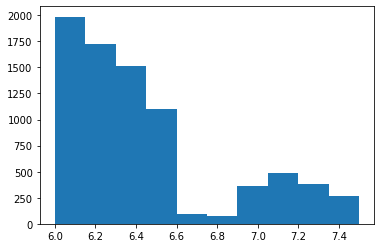

In [4]:
plt.hist(redshifts26)

In [5]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv', 599999)
mlt_train_drop = mlt_train_partial[['r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop[(mlt_train_drop['r_LSST_magerr']>0.2)&(mlt_train_drop['i_LSST_magerr']>0.2)]
mlt_train_drop = mlt_train_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('mlt_train_catalog_z.csv partial data description: ')
mlt_train_drop.describe()

mlt_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000
mean,27.846360,26.406950,24.814468,24.240156,23.941957,23.954919
std,0.866560,0.814595,0.652294,0.636044,0.633295,0.639822
min,26.565172,24.640153,22.966413,22.249321,21.884903,21.705643
25%,27.248318,25.848575,24.336096,23.782861,23.500746,23.511528
50%,27.631539,26.262382,24.722558,24.157091,23.877018,23.890470
75%,28.184954,26.792510,25.207169,24.619578,24.324022,24.337251
max,38.215437,36.198974,28.369839,27.735964,27.180561,27.305963


In [6]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
galaxies_patch8789_drop = galaxies_patch8789_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop[(galaxies_patch8789_drop['r_LSST_magerr']>0.2)&(galaxies_patch8789_drop['i_LSST_magerr']>0.2)]
galaxies_patch8789_drop = galaxies_patch8789_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_drop.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000
mean,28.112741,27.507701,27.330679,27.226355,27.160891,27.154280
std,0.888656,0.950758,0.788433,0.796900,0.827853,0.977009
min,26.647539,25.462982,25.152190,24.748167,24.475726,24.258516
25%,27.518918,26.883531,26.837638,26.737179,26.657671,26.557470
50%,27.920273,27.314756,27.248012,27.172407,27.118375,27.041903
75%,28.465759,27.895376,27.710084,27.634895,27.594613,27.601858
max,40.029429,39.261958,39.647494,40.707497,38.204669,38.379259


In [7]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
galaxies_patch8786_drop = galaxies_patch8786_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop[(galaxies_patch8786_drop['r_LSST_magerr']>0.2)&(galaxies_patch8786_drop['i_LSST_magerr']>0.2)]
galaxies_patch8786_drop = galaxies_patch8786_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_drop.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000
mean,28.100850,27.494201,27.312886,27.205306,27.141588,27.131087
std,0.886176,0.952283,0.787836,0.803831,0.842035,0.981599
min,26.573603,25.553776,25.107279,24.705397,24.460871,24.280885
25%,27.507437,26.871509,26.818015,26.714655,26.633409,26.535319
50%,27.905555,27.298765,27.235464,27.156027,27.102194,27.024863
75%,28.452905,27.883030,27.697065,27.620381,27.584424,27.588149
max,40.812877,40.422024,37.436853,38.037623,37.411129,37.630643


In [8]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

In [9]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [10]:
qso_train_26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 24.0]
qso_train_26 = qso_train_26[qso_train_26['z_LSST_mag'] < 26.0]
print(len(qso_train_26))
mlt_train_26 = mlt_train_drop[mlt_train_drop['z_LSST_mag'] > 24.0]
mlt_train_26 = mlt_train_26[mlt_train_26['z_LSST_mag'] < 26.0]
print(len(mlt_train_26))
galaxies_patch8789_26 = galaxies_patch8789_drop[galaxies_patch8789_drop['z_LSST_mag'] > 24.0]
galaxies_patch8789_26 = galaxies_patch8789_26[galaxies_patch8789_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8789_26))
galaxies_patch8786_26 = galaxies_patch8786_drop[galaxies_patch8786_drop['z_LSST_mag'] > 24.0]
galaxies_patch8786_26 = galaxies_patch8786_26[galaxies_patch8786_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8786_26))

7514
13791
778
753


In [11]:
contaminants_26 = pd.concat([mlt_train_26, galaxies_patch8789_26, galaxies_patch8786_26], ignore_index=True)
data_train_26 = pd.concat([qso_train_26, contaminants_26], ignore_index=True)
X_drop_26 = data_train_26[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop_26 = data_train_26['label']

## KNN filters

In [12]:
# 1a
# x: z_LSST_mag-J_WFI_mag
# y: Y_WFI_mag-H_WFI_mag
# best score:  0.9881756756756758
filter1a = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=3)
features1a = [X_drop_26['z_LSST_mag']-X_drop_26['J_WFI_mag'], X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag']]
X1a = np.array(features1a).transpose()

filter1a.fit(X1a, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=3)

In [13]:
# 1b
# x: Y - H 
# y: i - H
# best score:  0.9938063063063063
filter1b = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=5)
features1b = [X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['H_WFI_mag']]
X1b = np.array(features1b).transpose()

filter1b.fit(X1b, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=5)

In [14]:
# 1c 
# x: z - H
# y: J - H
# best score:  0.9463213213213213
filter1c = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=36, leaf_size=3, weights='uniform', p=5)
features1c = [X_drop_26['z_LSST_mag']-X_drop_26['H_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1c = np.array(features1c).transpose()

filter1c.fit(X1c, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=36, p=5)

In [15]:
# 1d
# x: z_LSST_mag-Y_WFI_mag
# y: i_LSST_mag-F_WFI_mag
# best score:  0.9678428428428428
filter1d = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=45, leaf_size=3, weights='uniform', p=5)
features1d = [X_drop_26['z_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['F_WFI_mag']]
X1d = np.array(features1d).transpose()

filter1d.fit(X1d, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=45, p=5)

In [16]:
# 1e
# Y - J
# J - H
# best score: deleted, assume 0.95
filter1e = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1e = [X_drop_26['Y_WFI_mag']-X_drop_26['J_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1e = np.array(features1e).transpose()

filter1e.fit(X1e, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [17]:
# 1f
# x: i - Y
# y: J - H
# best score:  0.9161036036036035
filter1f = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1f = [X_drop_26['i_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1f = np.array(features1f).transpose()

filter1f.fit(X1f, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

# Test (J <= 25.5)

In [18]:
# retrieve redshift for later usage
qso_test = pd.read_csv('Pq_test_qsoLF_WFI_abmag_wl_2150_J180J255_1130_10r.csv', index_col=False)
qso_test = qso_test[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]
# qso_test = qso_test.replace(99.99, np.nan).dropna()
# qso_test = qso_test[(qso_test['z']>7.0)&(qso_test['z']<7.5)]
qso_test.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,52.007152,46.325333,24.179616,23.797500,23.878504,23.807715
std,33.508987,31.769389,2.084696,1.215856,1.235016,1.246663
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,28.230980,27.053773,23.348818,23.011088,23.101270,23.019650
50%,29.332692,28.105708,24.344804,24.026517,24.107350,24.043184
75%,99.990000,99.990000,25.117105,24.772371,24.857233,24.788887
max,99.990000,99.990000,99.990000,25.498656,25.777677,25.823568


In [19]:
qso_test = qso_test.rename(columns={'i_LSST_abmag': 'i_LSST_mag', 'z_LSST_abmag': 'z_LSST_mag', 'Y_WFI_abmag': 'Y_WFI_mag', 'J_WFI_abmag': 'J_WFI_mag', 'H_WFI_abmag': 'H_WFI_mag', 'F_WFI_abmag': 'F_WFI_mag'})

In [20]:
qso_test['index']

0           qsoLF-1
1       qsoLF-24583
2       qsoLF-16392
3       qsoLF-24586
4       qsoLF-16397
           ...     
2145     qsoLF-8155
2146    qsoLF-24539
2147    qsoLF-16362
2148    qsoLF-24559
2149    qsoLF-24569
Name: index, Length: 2150, dtype: object

In [21]:
gal_test0 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117135_J180J255_1130_p0.csv', index_col=False)
# gal_test0 = gal_test0.replace(99.99, np.nan).dropna()
gal_test0 = gal_test0[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test2 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p2.csv', index_col=False)
# gal_test2 = gal_test2.replace(99.989998, np.nan).dropna()
gal_test2 = gal_test2[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test3 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p3.csv', index_col=False)
# gal_test3 = gal_test3.replace(99.989998, np.nan).dropna()
gal_test3 = gal_test3[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test4 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p4.csv', index_col=False)
# gal_test4 = gal_test4.replace(99.989998, np.nan).dropna()
gal_test4 = gal_test4[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test5 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p5.csv', index_col=False)
# gal_test5 = gal_test5.replace(99.989998, np.nan).dropna()
gal_test5 = gal_test5[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test6 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p6.csv', index_col=False)
# gal_test6 = gal_test6.replace(99.989998	, np.nan).dropna()
gal_test6 = gal_test6[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test7 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p7.csv', index_col=False)
# gal_test7 = gal_test7.replace(99.989998, np.nan).dropna()
gal_test7 = gal_test7[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test8 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p8.csv', index_col=False)
gal_test8 = gal_test8[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test9 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p9.csv', index_col=False)
# gal_test9 = gal_test9.replace(99.989998, np.nan).dropna()
gal_test9 = gal_test9[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test = pd.concat([gal_test2, gal_test3, gal_test4, gal_test5, gal_test6, gal_test7, gal_test8, gal_test9], ignore_index=True)
gal_test = gal_test.rename(columns={'i_LSST_abmag': 'i_LSST_mag', 'z_LSST_abmag': 'z_LSST_mag', 'Y_WFI_abmag': 'Y_WFI_mag', 'J_WFI_abmag': 'J_WFI_mag', 'H_WFI_abmag': 'H_WFI_mag', 'F_WFI_abmag': 'F_WFI_mag'})

In [22]:
# gal_test = gal_test.sample(frac=0.15, random_state=42)
gal_test.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,937072.000000,937072.000000,937072.000000,937072.000000,937072.000000,937072.000000
mean,28.351886,28.286000,25.968517,25.356040,25.199217,25.095960
std,5.406274,8.363648,0.213025,0.122607,0.153367,0.177582
min,27.173052,26.408033,24.979404,24.473455,24.240412,24.038563
25%,27.667616,26.955724,25.825436,25.295492,25.118233,24.993437
50%,27.830496,27.171208,25.965383,25.386971,25.223930,25.110626
75%,28.089520,27.515009,26.100325,25.449694,25.302738,25.213701
max,99.989998,99.989998,27.625261,25.500000,25.784363,25.946293


In [23]:
# pre-filtered with r_err > 0.2, i_err > 0.2, and J_mag < 25.5
mlt_test1 = pd.read_csv('mlt_test_catalog_1r.csv', index_col=False)
mlt_test2 = pd.read_csv('mlt_test_catalog_2r.csv', index_col=False)
mlt_test3 = pd.read_csv('mlt_test_catalog_3r.csv', index_col=False)
mlt_test4 = pd.read_csv('mlt_test_catalog_4r.csv', index_col=False)
mlt_test5 = pd.read_csv('mlt_test_catalog_5r.csv', index_col=False)
mlt_test6 = pd.read_csv('mlt_test_catalog_6r.csv', index_col=False)
mlt_test7 = pd.read_csv('mlt_test_catalog_7r.csv', index_col=False)
mlt_test8 = pd.read_csv('mlt_test_catalog_8r.csv', index_col=False)
mlt_test9 = pd.read_csv('mlt_test_catalog_9r.csv', index_col=False)
mlt_test10 = pd.read_csv('mlt_test_catalog_10r.csv', index_col=False)

mlt_test = pd.concat([mlt_test1, mlt_test2, mlt_test3, mlt_test4, mlt_test5, mlt_test6, mlt_test7, mlt_test8, mlt_test9, mlt_test10], ignore_index=True)
mlt_test.describe()

,spt,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,1.229565e+06,1.229565e+06,1.229565e+06,1.229565e+06,1.229565e+06,1.229565e+06,1.229565e+06
mean,1.912743e+01,2.805031e+01,3.137600e+01,2.516479e+01,2.454184e+01,2.439020e+01,2.468076e+01
std,5.267155e+00,9.127295e-01,1.723992e+01,6.178208e-01,5.914627e-01,7.627135e-01,1.565040e+00
min,7.000000e+00,2.652995e+01,2.430669e+01,2.228859e+01,2.196655e+01,2.176873e+01,2.156274e+01
25%,1.500000e+01,2.742045e+01,2.638471e+01,2.470481e+01,2.409658e+01,2.381853e+01,2.387726e+01
50%,1.900000e+01,2.786075e+01,2.700950e+01,2.521058e+01,2.458807e+01,2.436312e+01,2.451588e+01
75%,2.400000e+01,2.843422e+01,2.775633e+01,2.565515e+01,2.503631e+01,2.493001e+01,2.528696e+01
max,2.900000e+01,4.119283e+01,9.999000e+01,2.714779e+01,2.550000e+01,2.694761e+01,9.999000e+01


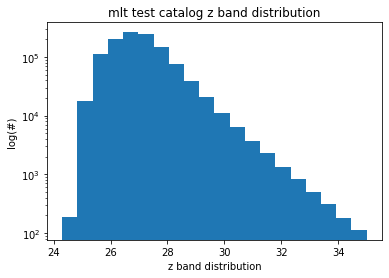

In [24]:
plt.hist(mlt_test[(mlt_test['z_LSST_mag']<35.0)&(mlt_test['z_LSST_mag']>15.0)]['z_LSST_mag'], bins=20)
plt.title('mlt test catalog z band distribution')
plt.yscale('log')
plt.xlabel('z band distribution')
plt.ylabel('log(#)')
plt.show()

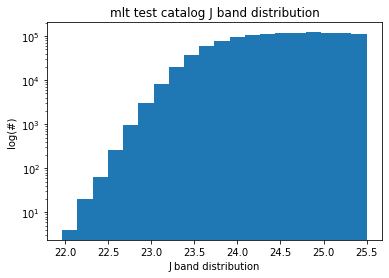

In [25]:
plt.hist(mlt_test[(mlt_test['J_WFI_mag']<35.0)&(mlt_test['J_WFI_mag']>15.0)]['J_WFI_mag'], bins=20)
plt.title('mlt test catalog J band distribution')
plt.yscale('log')
plt.xlabel('J band distribution')
plt.ylabel('log(#)')
plt.show()

In [26]:
qso_test['spt'] = np.zeros(len(qso_test))
gal_test['spt'] = np.zeros(len(gal_test))

In [27]:
test1 = pd.concat([qso_test, mlt_test, gal_test], ignore_index=True)

In [28]:
test1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt
count,2.168787e+06,2.168787e+06,2.168787e+06,2.168787e+06,2.168787e+06,2.168787e+06,2.168787e+06
mean,2.820436e+01,3.005572e+01,2.551108e+01,2.489289e+01,2.473925e+01,2.485929e+01,1.084404e+01
std,3.846809e+00,1.422426e+01,6.328255e-01,6.083011e-01,7.090128e-01,1.202980e+00,1.027394e+01
min,2.330193e+01,2.158256e+01,1.896275e+01,1.881515e+01,1.879964e+01,1.862181e+01,0.000000e+00
25%,2.758486e+01,2.677053e+01,2.509676e+01,2.447512e+01,2.423508e+01,2.436131e+01,0.000000e+00
50%,2.784152e+01,2.711641e+01,2.572488e+01,2.516226e+01,2.502197e+01,2.500417e+01,1.300000e+01
75%,2.825428e+01,2.761917e+01,2.598265e+01,2.538654e+01,2.526119e+01,2.522267e+01,2.000000e+01
max,9.999000e+01,9.999000e+01,9.999000e+01,2.550000e+01,2.694761e+01,9.999000e+01,2.900000e+01


### test - galaxies only

In [29]:
testg = pd.concat([qso_test, gal_test], ignore_index=True)

In [30]:
testg_copy = testg.copy().drop(columns=['index'])

In [31]:
# x: z - J
# y: Y - H
testf_1a = [testg_copy['z_LSST_mag']-testg_copy['J_WFI_mag'], testg_copy['Y_WFI_mag']-testg_copy['H_WFI_mag']]
prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())
print('prediction okay')
# prob_1a: [prob of negative class, prob of positive class]
testg_copy['prob_1a'] = prob_1a[:, 1]

prediction okay


In [32]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([testg_copy['Y_WFI_mag']-testg_copy['H_WFI_mag'], testg_copy['i_LSST_mag']-testg_copy['H_WFI_mag']]).transpose())

testg_copy['prob_1b'] = prob_1b[:, 1]

In [33]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([testg_copy['z_LSST_mag']-testg_copy['H_WFI_mag'], testg_copy['J_WFI_mag']-testg_copy['H_WFI_mag']]).transpose())

testg_copy['prob_1c'] = prob_1c[:, 1]

In [34]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([testg_copy['z_LSST_mag']-testg_copy['Y_WFI_mag'], testg_copy['i_LSST_mag']-testg_copy['Y_WFI_mag']]).transpose())

testg_copy['prob_1d'] = prob_1d[:, 1]

In [35]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([testg_copy['Y_WFI_mag']-testg_copy['J_WFI_mag'], testg_copy['J_WFI_mag']-testg_copy['H_WFI_mag']]).transpose())

testg_copy['prob_1e'] = prob_1e[:, 1]

In [36]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([testg_copy['i_LSST_mag']-testg_copy['Y_WFI_mag'], testg_copy['J_WFI_mag']-testg_copy['H_WFI_mag']]).transpose())

testg_copy['prob_1f'] = prob_1f[:, 1]

weights: <br> base: use best scores as weights <br>
1. increase/decrease by 1/6: <br> -> for galaxy: lower TP (1 less) and higher FP <br> -> for galaxy+mlt: higher TP, lower FP, there are FN in 24 < z < 26, slightly higher precision and recall scores

In [37]:
# use best scores as weights:
weights_g = [0.9882 *1.1, 0.9938*(1-1/6), 0.9463, 0.9678 *(1+1/6), 0.95*(1+1/6), 0.9161]
probabilities_g = testg_copy[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob_g = np.zeros(len(probabilities_g['prob_1a']))
for i in range(len(weights_g)):
    sum_weights = sum(weights_g)
    wprob_g += weights_g[i]*probabilities_g[cols[i]]/sum_weights

print(wprob_g.shape)

(939222,)


In [38]:
testg_copy['weighted prob'] = wprob_g
testg_copy.head()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
0,30.246452,32.650390,24.245616,24.307675,24.446622,24.450786,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
1,34.243426,99.990000,25.599446,25.428202,25.628616,25.369904,0.0,1.0,1.0,1.0,1.0,0.807692,1.0,0.962942
2,99.990000,99.990000,25.529441,24.281541,24.193409,24.320040,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,0.807297
3,27.659629,27.579103,23.129916,23.080119,23.222229,23.149084,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
4,28.805321,29.721087,24.914680,24.221812,24.357684,24.476417,0.0,1.0,0.0,1.0,1.0,0.000000,1.0,0.663305


In [39]:
pred_qso_g = testg_copy[testg_copy['weighted prob'] > 0.6]
pred_qso_g.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.0,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000
mean,46.223574,49.693686,25.153899,24.739645,24.743561,24.635832,0.0,0.925553,0.659299,0.901275,0.821639,0.536115,0.786267,0.765589
std,30.918545,32.959188,1.219678,1.127389,1.093109,1.080298,0.0,0.222379,0.432679,0.205807,0.324333,0.377165,0.262554,0.138086
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600012
25%,27.830457,27.146038,24.638684,24.311591,24.420643,24.347547,0.0,1.000000,0.076923,0.944444,0.911111,0.153846,0.615385,0.637322
50%,28.436337,29.024163,25.675905,25.360010,25.274330,25.122593,0.0,1.000000,1.000000,1.000000,1.000000,0.576923,0.961538,0.728081
75%,34.745637,99.989998,25.921083,25.452365,25.415971,25.288951,0.0,1.000000,1.000000,1.000000,1.000000,0.923077,1.000000,0.888833
max,99.990000,99.990000,29.983065,25.499907,25.777677,25.823568,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
tp_g = pred_qso_g.merge(qso_test)
tp_g.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.0,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000
mean,52.557195,46.322352,24.089081,23.763674,23.849392,23.775110,0.0,0.987365,0.939677,0.932576,0.922661,0.666593,0.978527,0.895560
std,33.714585,31.778634,1.270300,1.215726,1.237727,1.246542,0.0,0.099718,0.210017,0.171466,0.225918,0.382545,0.078582,0.103511
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.269231,0.601839
25%,28.223719,27.031637,23.308407,22.979159,23.074771,22.989228,0.0,1.000000,1.000000,1.000000,1.000000,0.346154,1.000000,0.807297
50%,29.359653,28.105708,24.295436,23.977240,24.068558,23.998185,0.0,1.000000,1.000000,1.000000,1.000000,0.884615,1.000000,0.933295
75%,99.990000,99.990000,25.046542,24.736365,24.832867,24.749518,0.0,1.000000,1.000000,1.000000,1.000000,0.961538,1.000000,0.985177
max,99.990000,99.990000,29.983065,25.498656,25.777677,25.823568,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


z-band distribution of TP:


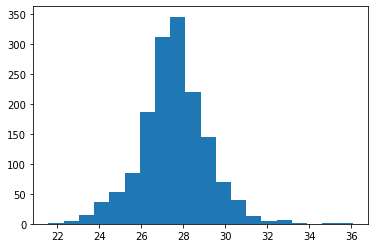

In [41]:
print('z-band distribution of TP:')
plt.hist(tp_g[tp_g['z_LSST_mag'] < 40.0]['z_LSST_mag'], bins=20)
plt.show()

In [42]:
# false positive: the difference between tp and pred positive
fp_g = pd.merge(tp_g, pred_qso_g, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [43]:
fp_g.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x,prob_1a_x,prob_1b_x,prob_1c_x,...,prob_1f_x,weighted prob_x,spt_y,prob_1a_y,prob_1b_y,prob_1c_y,prob_1d_y,prob_1e_y,prob_1f_y,weighted prob_y
count,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,2988.0,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000
mean,41.823107,52.036018,25.893712,25.417729,25.364811,25.233843,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.882607,0.464499,0.879527,0.751450,0.445461,0.652688,0.675287
std,27.990816,33.561521,0.254977,0.075362,0.139130,0.161507,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.269099,0.440555,0.224091,0.361696,0.345557,0.262708,0.070566
min,27.337587,26.536684,25.369457,24.858419,24.718040,24.566710,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600012
25%,27.780147,27.273854,25.703145,25.384063,25.285660,25.125082,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.923077,0.000000,0.861111,0.288889,0.076923,0.461538,0.620041
50%,28.044255,29.695087,25.859137,25.439784,25.378009,25.230800,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.000000,0.461538,1.000000,1.000000,0.423077,0.653846,0.650406
75%,30.436465,99.989998,26.021430,25.472895,25.458081,25.345644,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.000000,1.000000,1.000000,1.000000,0.807692,0.884615,0.712357
max,99.989998,99.989998,27.308872,25.499907,25.714794,25.781113,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970353


In [60]:
fp_g = fp_g.drop(columns=['spt_x', 'weighted prob_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x'])
fp_g.rename(columns={'spt_y': 'spt', 'weighted prob_y': 'weighted prob', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp_g.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.0,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000
mean,41.823107,52.036018,25.893712,25.417729,25.364811,25.233843,0.0,0.882607,0.464499,0.879527,0.751450,0.445461,0.652688,0.675287
std,27.990816,33.561521,0.254977,0.075362,0.139130,0.161507,0.0,0.269099,0.440555,0.224091,0.361696,0.345557,0.262708,0.070566
min,27.337587,26.536684,25.369457,24.858419,24.718040,24.566710,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600012
25%,27.780147,27.273854,25.703145,25.384063,25.285660,25.125082,0.0,0.923077,0.000000,0.861111,0.288889,0.076923,0.461538,0.620041
50%,28.044255,29.695087,25.859137,25.439784,25.378009,25.230800,0.0,1.000000,0.461538,1.000000,1.000000,0.423077,0.653846,0.650406
75%,30.436465,99.989998,26.021430,25.472895,25.458081,25.345644,0.0,1.000000,1.000000,1.000000,1.000000,0.807692,0.884615,0.712357
max,99.989998,99.989998,27.308872,25.499907,25.714794,25.781113,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970353


In [61]:
false_positive_g = fp_g.merge(testg, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])
# false_positive1 = false_positive1.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
# false_positive1 = false_positive1.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
false_positive_g.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,spt_y
count,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.0,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.0
mean,41.823107,52.036018,25.893712,25.417729,25.364811,25.233843,0.0,0.882607,0.464499,0.879527,0.751450,0.445461,0.652688,0.675287,0.0
std,27.990816,33.561521,0.254977,0.075362,0.139130,0.161507,0.0,0.269099,0.440555,0.224091,0.361696,0.345557,0.262708,0.070566,0.0
min,27.337587,26.536684,25.369457,24.858419,24.718040,24.566710,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600012,0.0
25%,27.780147,27.273854,25.703145,25.384063,25.285660,25.125082,0.0,0.923077,0.000000,0.861111,0.288889,0.076923,0.461538,0.620041,0.0
50%,28.044255,29.695087,25.859137,25.439784,25.378009,25.230800,0.0,1.000000,0.461538,1.000000,1.000000,0.423077,0.653846,0.650406,0.0
75%,30.436465,99.989998,26.021430,25.472895,25.458081,25.345644,0.0,1.000000,1.000000,1.000000,1.000000,0.807692,0.884615,0.712357,0.0
max,99.989998,99.989998,27.308872,25.499907,25.714794,25.781113,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970353,0.0


z-band distribution of FP:


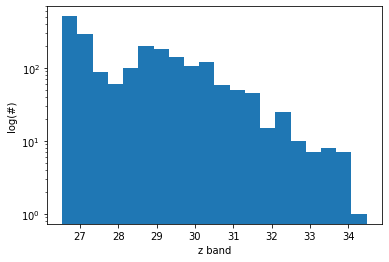

In [46]:
print('z-band distribution of FP:')
plt.hist(false_positive_g[false_positive_g['z_LSST_mag']<35.0]['z_LSST_mag'], bins=20)
plt.yscale('log')
plt.xlabel('z band')
plt.ylabel('log(#)')
plt.show()

J-band distribution of FP:


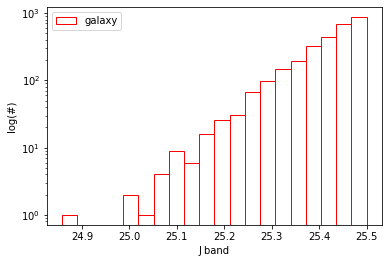

In [47]:
print('J-band distribution of FP:')
plt.hist(false_positive_g[false_positive_g['J_WFI_mag']<35.0]['J_WFI_mag'], bins=20, fill=False, edgecolor='red', label='galaxy')
plt.yscale('log')
plt.xlabel('J band')
plt.ylabel('log(#)')
plt.legend()
plt.show()

In [153]:
# false negative: the difference between all positive and predicted true positive
fn_g = pd.merge(tp_g, qso_test, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn_g = fn_g.drop(columns=['spt_x', 'prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f'])
fn_g.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,weighted prob,spt_y
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,0.0,73.0
mean,36.711934,46.720519,26.758494,24.753349,24.698837,24.728574,NaN,0.0
std,22.383623,31.832019,8.731600,0.744337,0.804872,0.833796,NaN,0.0
min,26.447094,23.713558,21.864300,21.618986,21.569299,21.296802,NaN,0.0
25%,28.349559,27.350760,25.358042,24.469324,24.430432,24.471047,NaN,0.0
50%,28.683341,28.193298,25.629184,24.960181,24.903725,24.892571,NaN,0.0
75%,29.818016,99.990000,26.104694,25.310005,25.234885,25.289948,NaN,0.0
max,99.990000,99.990000,99.990000,25.479870,25.524255,25.722612,NaN,0.0


In [159]:
false_negative = fn1.merge(pred_qso_g, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'],  how='left', indicator=True)
false_negative.describe()

,i_LSST_mag_x,z_LSST_mag,Y_WFI_mag_x,J_WFI_mag,H_WFI_mag_x,F_WFI_mag_x,spt_x,prob_1a_x,prob_1b_x,prob_1c_x,...,H_WFI_mag_y,F_WFI_mag_y,spt,prob_1a_y,prob_1b_y,prob_1c_y,prob_1d_y,prob_1e_y,prob_1f_y,weighted prob_y
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,36.711934,46.720519,26.758494,24.753349,24.698837,24.728574,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,22.383623,31.832019,8.731600,0.744337,0.804872,0.833796,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,26.447094,23.713558,21.864300,21.618986,21.569299,21.296802,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28.349559,27.350760,25.358042,24.469324,24.430432,24.471047,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28.683341,28.193298,25.629184,24.960181,24.903725,24.892571,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,29.818016,99.990000,26.104694,25.310005,25.234885,25.289948,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,99.990000,99.990000,99.990000,25.479870,25.524255,25.722612,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
lst = []
for i in range(len(fn_g)):
    for j in range(len(pred_qso_g)):
        if (fn_g.iloc[i]['z_LSST_mag'] == pred_qso_g.iloc[j]['z_LSST_mag']) and (fn_g.iloc[i]['J_WFI_mag'] == pred_qso_g.iloc[j]['J_WFI_mag']):
            lst.append(pred_qso_g.iloc[j].tolist())
            break
false_negative = pd.DataFrame(data=lst, columns=pred_qso_g.columns)
false_negative.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


z-band distribution of FN:


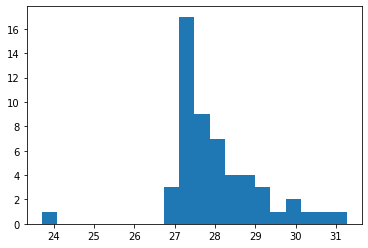

In [49]:
print('z-band distribution of FN:')
plt.hist(fn_g[fn_g['z_LSST_mag'] < 40.0]['z_LSST_mag'], bins=20)
plt.show()

## test-all

In [44]:
test1_copy = test1.copy().drop(columns=['index'])

In [45]:
# x: z - J
# y: Y - H
testf_1a = [test1_copy['z_LSST_mag']-test1_copy['J_WFI_mag'], test1_copy['Y_WFI_mag']-test1_copy['H_WFI_mag']]
prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())
print('prediction okay')
# prob_1a: [prob of negative class, prob of positive class]
test1_copy['prob_1a'] = prob_1a[:, 1]

prediction okay


In [46]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([test1_copy['Y_WFI_mag']-test1_copy['H_WFI_mag'], test1_copy['i_LSST_mag']-test1_copy['H_WFI_mag']]).transpose())

test1_copy['prob_1b'] = prob_1b[:, 1]

In [47]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([test1_copy['z_LSST_mag']-test1_copy['H_WFI_mag'], test1_copy['J_WFI_mag']-test1_copy['H_WFI_mag']]).transpose())

test1_copy['prob_1c'] = prob_1c[:, 1]

In [48]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([test1_copy['z_LSST_mag']-test1_copy['Y_WFI_mag'], test1_copy['i_LSST_mag']-test1_copy['Y_WFI_mag']]).transpose())

test1_copy['prob_1d'] = prob_1d[:, 1]

In [49]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([test1_copy['Y_WFI_mag']-test1_copy['J_WFI_mag'], test1_copy['J_WFI_mag']-test1_copy['H_WFI_mag']]).transpose())

test1_copy['prob_1e'] = prob_1e[:, 1]

In [50]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([test1_copy['i_LSST_mag']-test1_copy['Y_WFI_mag'], test1_copy['J_WFI_mag']-test1_copy['H_WFI_mag']]).transpose())

test1_copy['prob_1f'] = prob_1f[:, 1]

In [51]:
# use best scores as weights:
# weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
weights = [0.9882 *1.1, 0.9938*(1-1/6), 0.9463, 0.9678 *(1+1/6), 0.95*(1+1/6), 0.9161]
probabilities = test1_copy[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(2168787,)


In [52]:
test1_copy['weighted prob'] = wprob
test1_copy.head()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
0,30.246452,32.650390,24.245616,24.307675,24.446622,24.450786,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
1,34.243426,99.990000,25.599446,25.428202,25.628616,25.369904,0.0,1.0,1.0,1.0,1.0,0.807692,1.0,0.964565
2,99.990000,99.990000,25.529441,24.281541,24.193409,24.320040,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,0.815739
3,27.659629,27.579103,23.129916,23.080119,23.222229,23.149084,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
4,28.805321,29.721087,24.914680,24.221812,24.357684,24.476417,0.0,1.0,0.0,1.0,1.0,0.000000,1.0,0.678056


In [53]:
pred_qso1 = test1_copy[test1_copy['weighted prob'] > 0.6]
pred_qso1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000,171483.000000
mean,28.820738,48.998861,25.340983,24.832248,25.219276,26.061010,25.014246,0.995012,0.757683,0.958561,0.701539,0.181469,0.771573,0.717578
std,6.010782,32.512961,0.552925,0.526263,0.571103,2.405114,4.964475,0.049559,0.372181,0.090966,0.369110,0.273181,0.168436,0.089849
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600003
25%,27.597717,27.647869,25.035329,24.537208,24.891129,25.455648,25.000000,1.000000,0.615385,0.944444,0.266667,0.000000,0.692308,0.637052
50%,28.062164,28.731436,25.431674,24.938404,25.305722,26.028371,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.769231,0.701222
75%,28.788864,99.990000,25.734834,25.247272,25.626398,26.516009,27.000000,1.000000,1.000000,1.000000,1.000000,0.269231,0.923077,0.782483
max,99.990000,99.990000,29.983065,25.499999,26.809657,99.990000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
tp1 = pred_qso1.merge(qso_test)
tp1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.0,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000
mean,52.408333,46.434525,24.093270,23.766437,23.851728,23.777778,0.0,0.988515,0.936187,0.932736,0.921940,0.665239,0.976365,0.898620
std,33.662126,31.838349,1.270441,1.215664,1.237549,1.246505,0.0,0.094144,0.217300,0.171482,0.227248,0.383139,0.085520,0.101463
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.192308,0.601601
25%,28.223035,27.034776,23.319885,22.979814,23.076459,22.989520,0.0,1.000000,1.000000,1.000000,1.000000,0.346154,1.000000,0.815739
50%,29.355144,28.112944,24.296971,23.985022,24.069430,24.008191,0.0,1.000000,1.000000,1.000000,1.000000,0.884615,1.000000,0.936217
75%,99.990000,99.990000,25.049591,24.739126,24.835674,24.754102,0.0,1.000000,1.000000,1.000000,1.000000,0.961538,1.000000,0.985826
max,99.990000,99.990000,29.983065,25.498656,25.777677,25.823568,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


z-band distribution of TP:


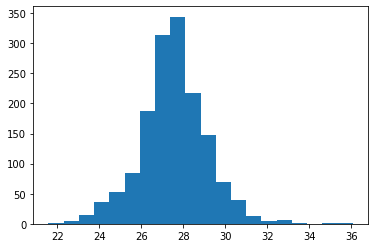

In [55]:
print('z-band distribution of TP:')
plt.hist(tp1[tp1['z_LSST_mag'] < 40.0]['z_LSST_mag'], bins=20)
plt.show()

In [56]:
# false positive: the difference between tp and pred positive
fp1 = pd.merge(tp1, pred_qso1, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [57]:
fp1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x,prob_1a_x,prob_1b_x,prob_1c_x,...,prob_1f_x,weighted prob_x,spt_y,prob_1a_y,prob_1b_y,prob_1c_y,prob_1d_y,prob_1e_y,prob_1f_y,weighted prob_y
count,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000
mean,28.530697,49.030393,25.356325,24.845354,25.236092,26.089086,NaN,NaN,NaN,NaN,...,NaN,NaN,25.321830,0.995092,0.755488,0.958878,0.698829,0.175520,0.769055,0.715352
std,3.965019,32.520002,0.519875,0.498051,0.536719,2.402439,NaN,NaN,NaN,NaN,...,NaN,NaN,4.142517,0.048753,0.373156,0.089481,0.369700,0.266135,0.167653,0.087393
min,26.655663,24.782236,22.288590,21.966552,22.448431,23.197803,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600003
25%,27.595229,27.654312,25.046940,24.548099,24.905310,25.478401,NaN,NaN,NaN,NaN,...,NaN,NaN,25.000000,1.000000,0.615385,0.944444,0.266667,0.000000,0.692308,0.637052
50%,28.055272,28.738051,25.437539,24.943710,25.312438,26.040392,NaN,NaN,NaN,NaN,...,NaN,NaN,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.769231,0.699341
75%,28.769547,99.990000,25.737752,25.249663,25.630575,26.522483,NaN,NaN,NaN,NaN,...,NaN,NaN,27.000000,1.000000,1.000000,1.000000,1.000000,0.269231,0.884615,0.780592
max,99.989998,99.990000,27.308872,25.499999,26.809657,99.990000,NaN,NaN,NaN,NaN,...,NaN,NaN,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
fp1 = fp1.drop(columns=['weighted prob_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x'])
fp1.rename(columns={'weighted prob_y': 'weighted prob', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x,spt_y,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,0.0,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000
mean,28.530697,49.030393,25.356325,24.845354,25.236092,26.089086,NaN,25.321830,0.995092,0.755488,0.958878,0.698829,0.175520,0.769055,0.715352
std,3.965019,32.520002,0.519875,0.498051,0.536719,2.402439,NaN,4.142517,0.048753,0.373156,0.089481,0.369700,0.266135,0.167653,0.087393
min,26.655663,24.782236,22.288590,21.966552,22.448431,23.197803,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600003
25%,27.595229,27.654312,25.046940,24.548099,24.905310,25.478401,NaN,25.000000,1.000000,0.615385,0.944444,0.266667,0.000000,0.692308,0.637052
50%,28.055272,28.738051,25.437539,24.943710,25.312438,26.040392,NaN,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.769231,0.699341
75%,28.769547,99.990000,25.737752,25.249663,25.630575,26.522483,NaN,27.000000,1.000000,1.000000,1.000000,1.000000,0.269231,0.884615,0.780592
max,99.989998,99.990000,27.308872,25.499999,26.809657,99.990000,NaN,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
false_positive1 = fp1.merge(test1, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])
# false_positive1 = false_positive1.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
# false_positive1 = false_positive1.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
false_positive1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x,spt_y,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,spt
count,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,0.0,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000,169400.000000
mean,28.530697,49.030393,25.356325,24.845354,25.236092,26.089086,NaN,25.321830,0.995092,0.755488,0.958878,0.698829,0.175520,0.769055,0.715352,25.321830
std,3.965019,32.520002,0.519875,0.498051,0.536719,2.402439,NaN,4.142517,0.048753,0.373156,0.089481,0.369700,0.266135,0.167653,0.087393,4.142517
min,26.655663,24.782236,22.288590,21.966552,22.448431,23.197803,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600003,0.000000
25%,27.595229,27.654312,25.046940,24.548099,24.905310,25.478401,NaN,25.000000,1.000000,0.615385,0.944444,0.266667,0.000000,0.692308,0.637052,25.000000
50%,28.055272,28.738051,25.437539,24.943710,25.312438,26.040392,NaN,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.769231,0.699341,26.000000
75%,28.769547,99.990000,25.737752,25.249663,25.630575,26.522483,NaN,27.000000,1.000000,1.000000,1.000000,1.000000,0.269231,0.884615,0.780592,27.000000
max,99.989998,99.990000,27.308872,25.499999,26.809657,99.990000,NaN,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


In [62]:
fp_mlt = pd.merge(false_positive1, false_positive_g, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='left', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fp_mlt.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x_x,spt_y_x,prob_1a_x,prob_1b_x,...,spt,spt_x_y,prob_1a_y,prob_1b_y,prob_1c_y,prob_1d_y,prob_1e_y,prob_1f_y,weighted prob_y,spt_y_y
count,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,0.0,166511.000000,166511.000000,166511.000000,...,166511.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,28.327110,48.963770,25.347100,24.835419,25.233831,26.103905,NaN,25.761169,0.996546,0.760825,...,25.761169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.100988,32.493047,0.518509,0.496461,0.540770,2.420439,NaN,2.477949,0.037849,0.369685,...,2.477949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,26.655663,24.782236,22.288590,21.966552,22.448431,23.197803,NaN,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.588839,27.655200,25.038571,24.539318,24.896335,25.511070,NaN,25.000000,1.000000,0.615385,...,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28.056064,28.722241,25.426425,24.932361,25.307654,26.056843,NaN,26.000000,1.000000,1.000000,...,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,28.764453,99.990000,25.728380,25.235810,25.636096,26.531342,NaN,27.000000,1.000000,1.000000,...,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,40.375336,99.990000,26.880306,25.499999,26.809657,99.990000,NaN,29.000000,1.000000,1.000000,...,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
fp_mlt.columns

Index(['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag',
       'F_WFI_mag', 'spt_x_x', 'index_x_x', 'spt_y_x', 'prob_1a_x',
       'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x',
       'weighted prob_x', 'index_y_x', 'spt', 'index_x_y', 'spt_x_y',
       'prob_1a_y', 'prob_1b_y', 'prob_1c_y', 'prob_1d_y', 'prob_1e_y',
       'prob_1f_y', 'weighted prob_y', 'index_y_y', 'spt_y_y'],
      dtype='object')

In [64]:
fp_mlt = fp_mlt.drop(columns=['spt_x_x', 'spt_x_y', 'spt_y_x', 'weighted prob_y', 'spt_y_y', 'prob_1a_y', 'prob_1b_y', 'prob_1c_y', 'prob_1d_y', 'prob_1e_y', 'prob_1f_y'])
# fp_mlt = fp_mlt.rename(columns={'spt_y_x': 'spt'})
fp_mlt = fp_mlt.rename(columns={'prob_1a_x': 'prob_1a', 'prob_1b_x': 'prob_1b', 'prob_1c_x': 'prob_1c', 'prob_1d_x': 'prob_1d', 'prob_1e_x': 'prob_1e', 'prob_1f_x': 'prob_1f', 'weighted prob_x': 'weighted prob'})
fp_mlt.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,spt
count,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000
mean,28.327110,48.963770,25.347100,24.835419,25.233831,26.103905,0.996546,0.760825,0.960028,0.698019,0.170719,0.771264,0.715830,25.761169
std,1.100988,32.493047,0.518509,0.496461,0.540770,2.420439,0.037849,0.369685,0.085471,0.369741,0.261979,0.164738,0.087600,2.477949
min,26.655663,24.782236,22.288590,21.966552,22.448431,23.197803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600003,0.000000
25%,27.588839,27.655200,25.038571,24.539318,24.896335,25.511070,1.000000,0.615385,0.944444,0.266667,0.000000,0.692308,0.637052,25.000000
50%,28.056064,28.722241,25.426425,24.932361,25.307654,26.056843,1.000000,1.000000,1.000000,1.000000,0.000000,0.769231,0.700537,26.000000
75%,28.764453,99.990000,25.728380,25.235810,25.636096,26.531342,1.000000,1.000000,1.000000,1.000000,0.230769,0.884615,0.781480,27.000000
max,40.375336,99.990000,26.880306,25.499999,26.809657,99.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


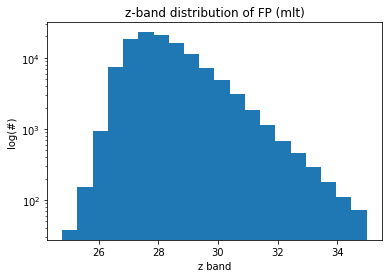

In [65]:
plt.hist(fp_mlt[fp_mlt['z_LSST_mag']<35.0]['z_LSST_mag'], bins=20)
plt.yscale('log')
plt.xlabel('z band')
plt.ylabel('log(#)')
plt.title('z-band distribution of FP (mlt)')
plt.show()

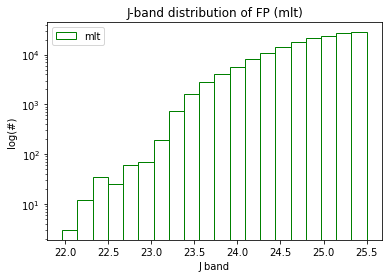

In [66]:
plt.hist(fp_mlt[fp_mlt['J_WFI_mag']<35.0]['J_WFI_mag'], bins=20, fill=False, edgecolor='green', label='mlt')
plt.yscale('log')
plt.xlabel('J band')
plt.ylabel('log(#)')
plt.title('J-band distribution of FP (mlt)')
plt.legend()
plt.show()

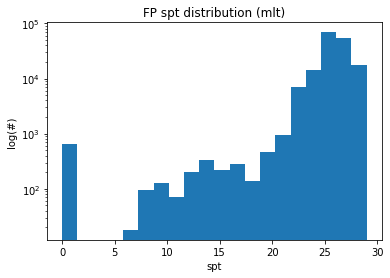

In [67]:
plt.hist(fp_mlt['spt'], bins=20)
plt.xlabel('spt')
plt.yscale('log')
plt.ylabel('log(#)')
plt.title('FP spt distribution (mlt)')
plt.show()

In [68]:
# false negative: the difference between all positive and predicted true positive
fn1 = pd.merge(tp1, qso_test, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
# fn1 = fn1.drop(columns=['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f'])
fn1.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,spt_x,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,spt_y
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
mean,39.534638,42.930590,26.864095,24.763255,24.710938,24.738451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,25.541589,29.565891,9.112690,0.733643,0.790427,0.826127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,26.447094,23.713558,21.864300,21.618986,21.569299,21.296802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,28.334273,27.309791,25.356764,24.458636,24.437172,24.495274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,28.683341,27.985078,25.756622,24.976518,24.944960,24.892571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,30.176940,30.064175,26.113574,25.316998,25.258238,25.299574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
max,99.990000,99.990000,99.990000,25.489637,25.554227,25.722612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [97]:
fn1.to_csv('z_pipeline_test_adjust_weights_fn.csv')

z-band distribution of FN:


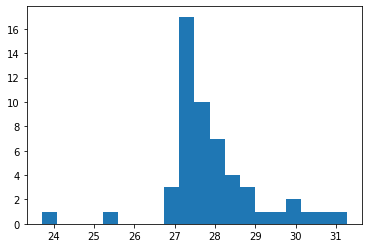

In [69]:
print('z-band distribution of FN:')
plt.hist(fn1[fn1['z_LSST_mag'] < 40.0]['z_LSST_mag'], bins=20)
plt.show()

J-band distribution of FN:


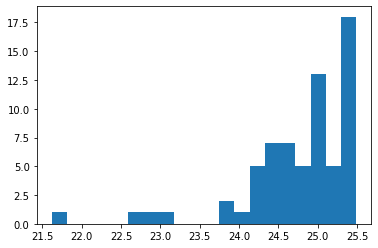

In [94]:
print('J-band distribution of FN:')
plt.hist(fn1[fn1['J_WFI_mag'] < 40.0]['J_WFI_mag'], bins=20)
plt.show()

In [70]:
print('w/o specific snr constraints, probability prediction results on test 1:\n')
print('precision:', round(tp1.shape[0]/(tp1.shape[0]+fp1.shape[0]), 4))
print('recall:', round(tp1.shape[0]/(tp1.shape[0]+fn1.shape[0]), 4))

w/o specific snr constraints, probability prediction results on test 1:

precision: 0.0121
recall: 0.9688


In [71]:
print('w/o specific snr constraints, probability prediction results on test 1, limit z < 26:\n')
print('precision:', round(tp1[tp1['z_LSST_mag']<26.0].shape[0]/(tp1[tp1['z_LSST_mag']<26.0].shape[0]+fp1[fp1['z_LSST_mag']<26.0].shape[0]), 4))
print('recall:', round(tp1[tp1['z_LSST_mag']<26.0].shape[0]/(tp1[tp1['z_LSST_mag']<26.0].shape[0]+fn1[fn1['z_LSST_mag']<26.0].shape[0]), 4))

w/o specific snr constraints, probability prediction results on test 1, limit z < 26:

precision: 0.3766
recall: 0.9904


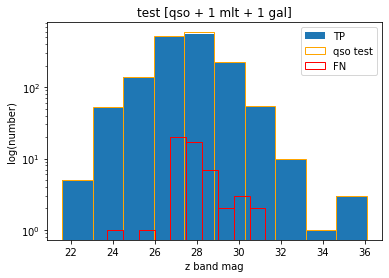

In [72]:
plt.hist(tp1[tp1['z_LSST_mag']<40.0]['z_LSST_mag'], label='TP')
plt.hist(qso_test[qso_test['z_LSST_mag']<40.0]['z_LSST_mag'], label='qso test', fill=False, edgecolor='orange')
plt.hist(fn1[fn1['z_LSST_mag']<40.0]['z_LSST_mag'], label='FN', fill=False, edgecolor='red')

plt.xlabel('z band mag')
plt.ylabel('log(number)')
plt.yscale('log')
plt.title('test [qso + 1 mlt + 1 gal]')
plt.legend()
plt.show()

In [73]:
def precision(TP, FP, FN, val):
    return round(TP[TP['J_WFI_mag']<val].shape[0]/(TP[TP['J_WFI_mag']<val].shape[0]+FP[FP['J_WFI_mag']<val].shape[0]), 4)


def recall(TP, FP, FN, val):
    return round(TP[TP['J_WFI_mag']<val].shape[0]/(TP[TP['J_WFI_mag']<val].shape[0]+FN[FN['J_WFI_mag']<val].shape[0]), 4)

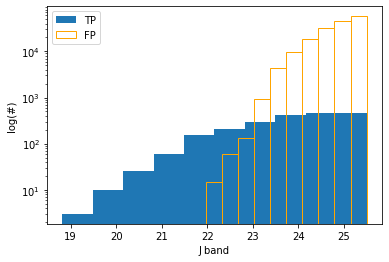

In [74]:
plt.hist(tp1['J_WFI_mag'], label='TP')
plt.hist(fp1['J_WFI_mag'], label='FP', fill=False, edgecolor='orange')
plt.xlabel('J band')
plt.yscale('log')
plt.ylabel('log(#)')
plt.legend()
plt.show()

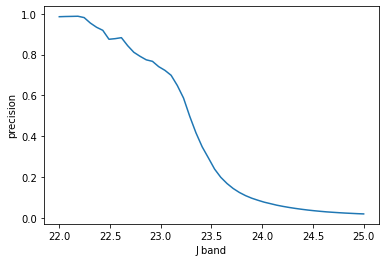

mean, J <= 25.0: 0.4229


In [75]:
x = np.linspace(22.0, 25.0, 50)
y = [precision(tp1, fp1, fn1, val) for val in x]
plt.plot(x, y)
plt.xlabel('J band')
plt.ylabel('precision')
plt.show()

print('mean, J <= 25.0:', round(np.mean(y), 4))

In [96]:
precision = pd.DataFrame(data=np.array([x, y]).transpose(), columns=['x', 'y'])
# precision.describe()
precision.to_csv('z_pipeline_test_adjust_weights_precision.csv')

## Color Diagram

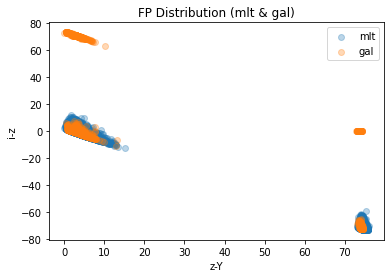

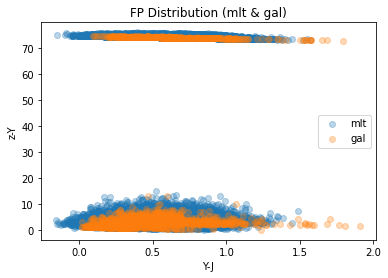

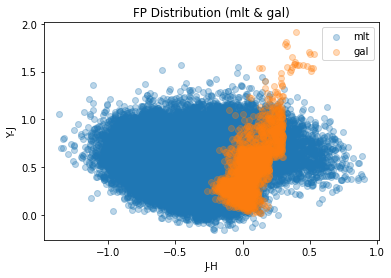

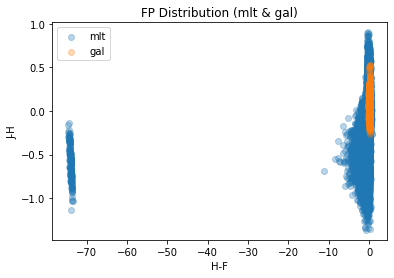

In [76]:
# i-z vs z-Y
plt.scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='mlt')
plt.scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='gal')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.legend()
plt.title('FP Distribution (mlt & gal)')
plt.show()

# z-Y vs Y-J
plt.scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], alpha=0.3, label='mlt')
plt.scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], alpha=0.3, label='gal')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.legend()
plt.title('FP Distribution (mlt & gal)')
plt.show()

# Y-J vs J-H
plt.scatter(fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], alpha=0.3, label='mlt')
plt.scatter(false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], alpha=0.3, label='gal')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.legend()
plt.title('FP Distribution (mlt & gal)')
plt.show()

# J-H vs H-F
plt.scatter(fp_mlt['H_WFI_mag']-fp_mlt['F_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='mlt')
plt.scatter(false_positive_g['H_WFI_mag']-false_positive_g['F_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='gal')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.legend()
plt.title('FP Distribution (mlt & gal)')
plt.show()

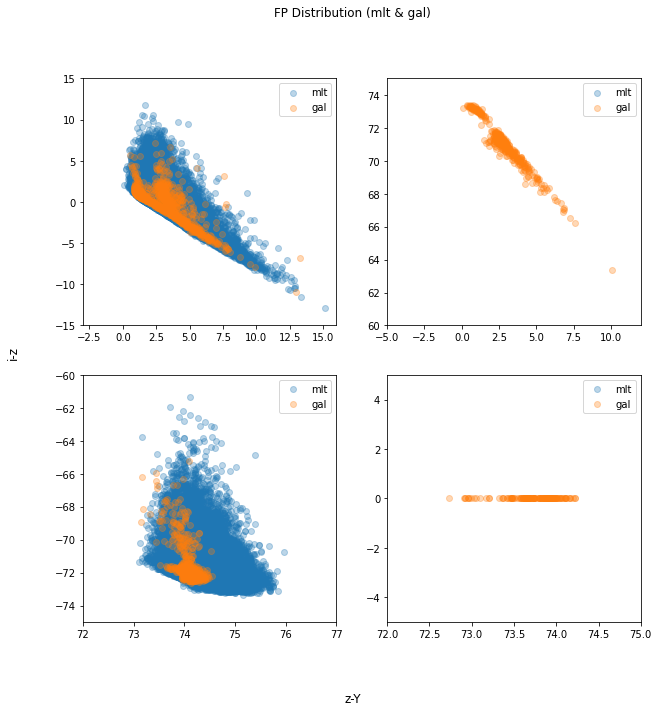

In [77]:
# i-z vs z-Y
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='mlt')
axes[0,0].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='gal')
axes[0,0].legend()
axes[0,0].set_xlim(-3.0, 16.0)
axes[0,0].set_ylim(-15.0, 15.0)

axes[0,1].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='mlt')
axes[0,1].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='gal')
axes[0,1].legend()
axes[0,1].set_xlim(-5.0, 12.0)
axes[0,1].set_ylim(60.0, 75.0)

axes[1,0].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='mlt')
axes[1,0].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='gal')
axes[1,0].legend()
axes[1,0].set_xlim(72.0, 77.0)
axes[1,0].set_ylim(-75.0, -60.0)

axes[1,1].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='mlt')
axes[1,1].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='gal')
axes[1,1].legend()
axes[1,1].set_xlim(72.0, 75.0)
axes[1,1].set_ylim(-5.0, 5.0)

fig.supxlabel('z-Y')
fig.supylabel('i-z')
fig.suptitle('FP Distribution (mlt & gal)')
plt.show()

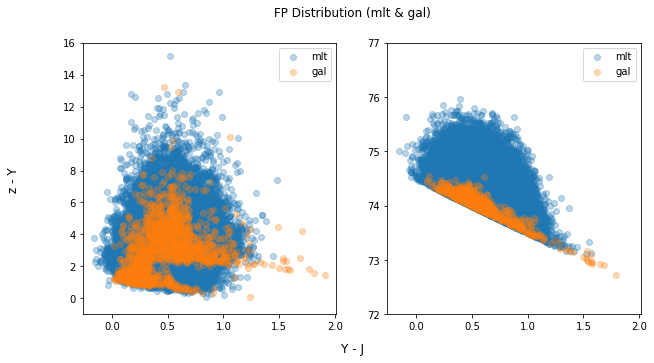

In [78]:
# z-Y vs Y-J
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], alpha=0.3, label='mlt')
axes[0].scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], alpha=0.3, label='gal')
axes[0].legend()
axes[0].set_ylim(-1.0, 16.0)

axes[1].scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], alpha=0.3, label='mlt')
axes[1].scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], alpha=0.3, label='gal')
axes[1].legend()
axes[1].set_ylim(72.0, 77.0)

fig.supxlabel('Y - J')
fig.supylabel('z - Y')
fig.suptitle('FP Distribution (mlt & gal)')
plt.show()

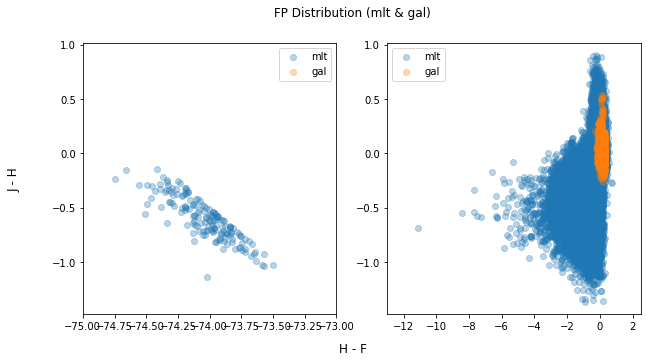

In [79]:
# J-H vs H-F
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(fp_mlt['H_WFI_mag']-fp_mlt['F_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='mlt')
axes[0].scatter(false_positive_g['H_WFI_mag']-false_positive_g['F_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='gal')
axes[0].legend()
axes[0].set_xlim(-75.0, -73.0)

axes[1].scatter(fp_mlt['H_WFI_mag']-fp_mlt['F_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='mlt')
axes[1].scatter(false_positive_g['H_WFI_mag']-false_positive_g['F_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='gal')
axes[1].legend()
axes[1].set_xlim(-13.0, 2.5)

fig.supxlabel('H - F')
fig.supylabel('J - H')
fig.suptitle('FP Distribution (mlt & gal)')
plt.show()

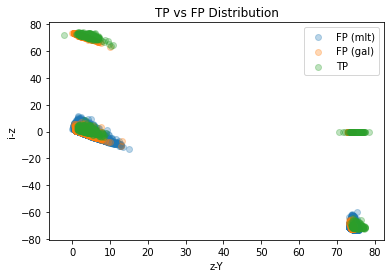

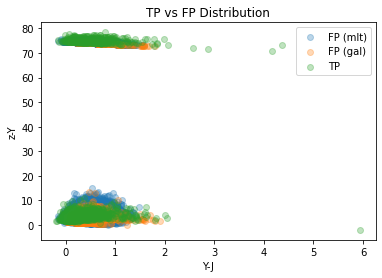

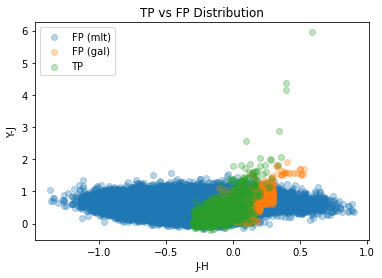

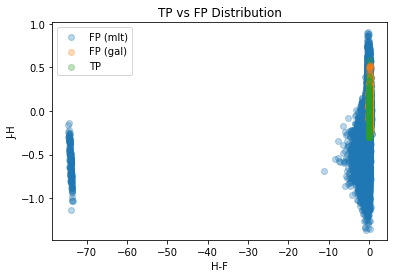

In [80]:
# i-z vs z-Y
plt.scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='FP (mlt)')
plt.scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='FP (gal)')
plt.scatter(tp1['z_LSST_mag']-tp1['Y_WFI_mag'], tp1['i_LSST_mag']-tp1['z_LSST_mag'], alpha=0.3, label='TP')
plt.xlabel('z-Y')
plt.ylabel('i-z')
plt.legend()
plt.title('TP vs FP Distribution')
plt.show()

# z-Y vs Y-J
plt.scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], alpha=0.3, label='FP (mlt)')
plt.scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], alpha=0.3, label='FP (gal)')
plt.scatter(tp1['Y_WFI_mag']-tp1['J_WFI_mag'], tp1['z_LSST_mag']-tp1['Y_WFI_mag'], alpha=0.3, label='TP')
plt.xlabel('Y-J')
plt.ylabel('z-Y')
plt.legend()
plt.title('TP vs FP Distribution')
plt.show()

# Y-J vs J-H
plt.scatter(fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], alpha=0.3, label='FP (mlt)')
plt.scatter(false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], alpha=0.3, label='FP (gal)')
plt.scatter(tp1['J_WFI_mag']-tp1['H_WFI_mag'], tp1['Y_WFI_mag']-tp1['J_WFI_mag'], alpha=0.3, label='TP')
plt.xlabel('J-H')
plt.ylabel('Y-J')
plt.legend()
plt.title('TP vs FP Distribution')
plt.show()

# J-H vs H-F
plt.scatter(fp_mlt['H_WFI_mag']-fp_mlt['F_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='FP (mlt)')
plt.scatter(false_positive_g['H_WFI_mag']-false_positive_g['F_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='FP (gal)')
plt.scatter(tp1['H_WFI_mag']-tp1['H_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='TP')
plt.xlabel('H-F')
plt.ylabel('J-H')
plt.legend()
plt.title('TP vs FP Distribution')
plt.show()

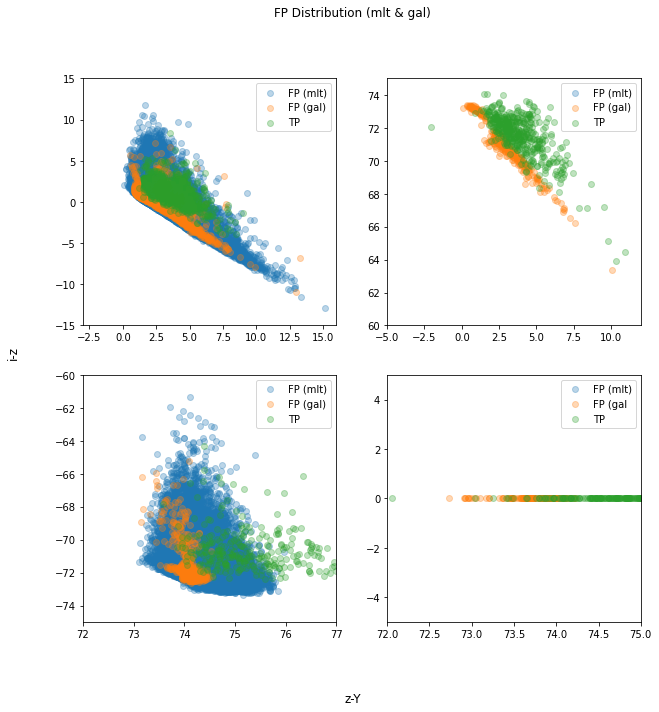

In [81]:
# i-z vs z-Y
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='FP (mlt)')
axes[0,0].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='FP (gal)')
axes[0,0].scatter(tp1['z_LSST_mag']-tp1['Y_WFI_mag'], tp1['i_LSST_mag']-tp1['z_LSST_mag'], alpha=0.3, label='TP')
axes[0,0].legend()
axes[0,0].set_xlim(-3.0, 16.0)
axes[0,0].set_ylim(-15.0, 15.0)

axes[0,1].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='FP (mlt)')
axes[0,1].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='FP (gal)')
axes[0,1].scatter(tp1['z_LSST_mag']-tp1['Y_WFI_mag'], tp1['i_LSST_mag']-tp1['z_LSST_mag'], alpha=0.3, label='TP')
axes[0,1].legend()
axes[0,1].set_xlim(-5.0, 12.0)
axes[0,1].set_ylim(60.0, 75.0)

axes[1,0].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='FP (mlt)')
axes[1,0].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='FP (gal)')
axes[1,0].scatter(tp1['z_LSST_mag']-tp1['Y_WFI_mag'], tp1['i_LSST_mag']-tp1['z_LSST_mag'], alpha=0.3, label='TP')
axes[1,0].legend()
axes[1,0].set_xlim(72.0, 77.0)
axes[1,0].set_ylim(-75.0, -60.0)

axes[1,1].scatter(fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], fp_mlt['i_LSST_mag']-fp_mlt['z_LSST_mag'], alpha=0.3, label='FP (mlt)')
axes[1,1].scatter(false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], false_positive_g['i_LSST_mag']-false_positive_g['z_LSST_mag'], alpha=0.3, label='FP (gal')
axes[1,1].scatter(tp1['z_LSST_mag']-tp1['Y_WFI_mag'], tp1['i_LSST_mag']-tp1['z_LSST_mag'], alpha=0.3, label='TP')
axes[1,1].legend()
axes[1,1].set_xlim(72.0, 75.0)
axes[1,1].set_ylim(-5.0, 5.0)

fig.supxlabel('z-Y')
fig.supylabel('i-z')
fig.suptitle('FP Distribution (mlt & gal)')
plt.show()

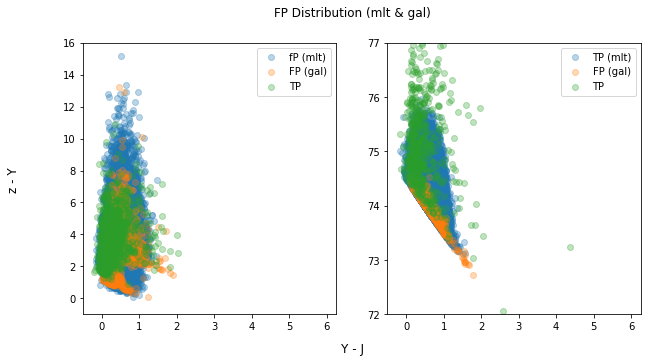

In [82]:
# z-Y vs Y-J
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], alpha=0.3, label='fP (mlt)')
axes[0].scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], alpha=0.3, label='FP (gal)')
axes[0].scatter(tp1['Y_WFI_mag']-tp1['J_WFI_mag'], tp1['z_LSST_mag']-tp1['Y_WFI_mag'], alpha=0.3, label='TP')
axes[0].legend()
axes[0].set_ylim(-1.0, 16.0)

axes[1].scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['z_LSST_mag']-fp_mlt['Y_WFI_mag'], alpha=0.3, label='TP (mlt)')
axes[1].scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['z_LSST_mag']-false_positive_g['Y_WFI_mag'], alpha=0.3, label='FP (gal)')
axes[1].scatter(tp1['Y_WFI_mag']-tp1['J_WFI_mag'], tp1['z_LSST_mag']-tp1['Y_WFI_mag'], alpha=0.3, label='TP')
axes[1].legend()
axes[1].set_ylim(72.0, 77.0)

fig.supxlabel('Y - J')
fig.supylabel('z - Y')
fig.suptitle('FP Distribution (mlt & gal)')
plt.show()

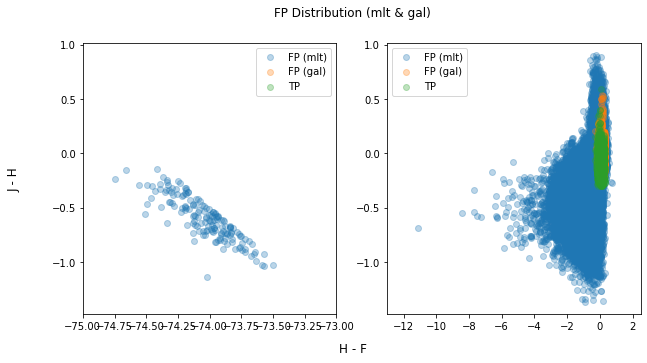

In [83]:
# J-H vs H-F
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(fp_mlt['H_WFI_mag']-fp_mlt['F_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='FP (mlt)')
axes[0].scatter(false_positive_g['H_WFI_mag']-false_positive_g['F_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='FP (gal)')
axes[0].scatter(tp1['H_WFI_mag']-tp1['F_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='TP')
axes[0].legend()
axes[0].set_xlim(-75.0, -73.0)

axes[1].scatter(fp_mlt['H_WFI_mag']-fp_mlt['F_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='FP (mlt)')
axes[1].scatter(false_positive_g['H_WFI_mag']-false_positive_g['F_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='FP (gal)')
axes[1].scatter(tp1['H_WFI_mag']-tp1['F_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='TP')
axes[1].legend()
axes[1].set_xlim(-13.0, 2.5)

fig.supxlabel('H - F')
fig.supylabel('J - H')
fig.suptitle('FP Distribution (mlt & gal)')
plt.show()

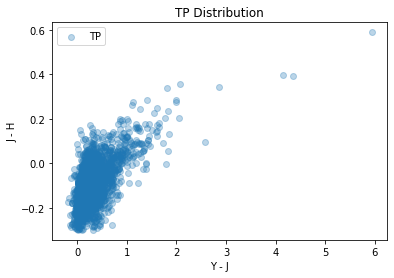

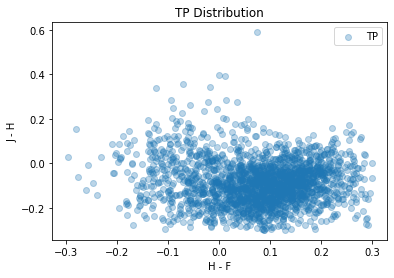

In [84]:
plt.scatter(tp1['Y_WFI_mag']-tp1['J_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='TP')
plt.legend()
plt.title('TP Distribution')
plt.xlabel('Y - J')
plt.ylabel('J - H')
plt.show()
plt.scatter(tp1['H_WFI_mag']-tp1['F_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='TP')
plt.title('TP Distribution')
plt.legend()
plt.xlabel('H - F')
plt.ylabel('J - H')
plt.show()

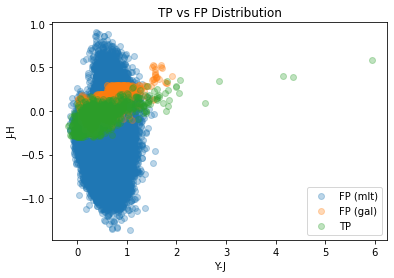

In [85]:
# J-H vs Y-J
plt.scatter(fp_mlt['Y_WFI_mag']-fp_mlt['J_WFI_mag'], fp_mlt['J_WFI_mag']-fp_mlt['H_WFI_mag'], alpha=0.3, label='FP (mlt)')
plt.scatter(false_positive_g['Y_WFI_mag']-false_positive_g['J_WFI_mag'], false_positive_g['J_WFI_mag']-false_positive_g['H_WFI_mag'], alpha=0.3, label='FP (gal)')
plt.scatter(tp1['Y_WFI_mag']-tp1['J_WFI_mag'], tp1['J_WFI_mag']-tp1['H_WFI_mag'], alpha=0.3, label='TP')
plt.xlabel('Y-J')
plt.ylabel('J-H')
plt.legend()
plt.title('TP vs FP Distribution')
plt.show()

In [86]:
fp_mlt.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob,spt
count,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000,166511.000000
mean,28.327110,48.963770,25.347100,24.835419,25.233831,26.103905,0.996546,0.760825,0.960028,0.698019,0.170719,0.771264,0.715830,25.761169
std,1.100988,32.493047,0.518509,0.496461,0.540770,2.420439,0.037849,0.369685,0.085471,0.369741,0.261979,0.164738,0.087600,2.477949
min,26.655663,24.782236,22.288590,21.966552,22.448431,23.197803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600003,0.000000
25%,27.588839,27.655200,25.038571,24.539318,24.896335,25.511070,1.000000,0.615385,0.944444,0.266667,0.000000,0.692308,0.637052,25.000000
50%,28.056064,28.722241,25.426425,24.932361,25.307654,26.056843,1.000000,1.000000,1.000000,1.000000,0.000000,0.769231,0.700537,26.000000
75%,28.764453,99.990000,25.728380,25.235810,25.636096,26.531342,1.000000,1.000000,1.000000,1.000000,0.230769,0.884615,0.781480,27.000000
max,40.375336,99.990000,26.880306,25.499999,26.809657,99.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


In [87]:
import seaborn as sns

filter 1a, x: z - J, y: Y - H 
 count    166511.000000
mean          0.996546
std           0.037849
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: prob_1a, dtype: float64
filter 1d, x: z - Y; y: i - Y 
 count    166511.000000
mean          0.698019
std           0.369741
min           0.000000
25%           0.266667
50%           1.000000
75%           1.000000
max           1.000000
Name: prob_1d, dtype: float64


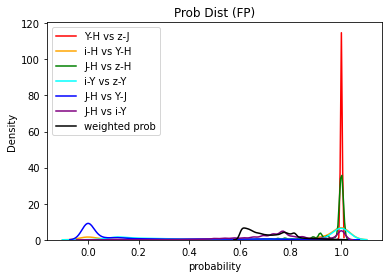

In [88]:
# filter 1a, x: z - J, y: Y - H
sns.kdeplot(fp_mlt['prob_1a'], label='Y-H vs z-J', color='red')
#plt.hist( fp_mlt['prob_1a'], fill=False, label='Y-H vs z-J', edgecolor='red')
print('filter 1a, x: z - J, y: Y - H \n',  fp_mlt['prob_1a'].describe())

# filter 1b, x: Y - H, y: i - H
sns.kdeplot(fp_mlt['prob_1b'], label='i-H vs Y-H', color='orange')
# plt.hist( fp_mlt['prob_1b'], fill=False, label='i-H vs Y-H', edgecolor='orange')

# filter 1c, x: z - H, y: J - H
sns.kdeplot(fp_mlt['prob_1c'], label='J-H vs z-H', color='green')
#plt.hist( fp_mlt['prob_1c'], fill=False, label='J-H vs z-H', edgecolor='green')

# filter 1d, x: z - Y; y: i - Y
sns.kdeplot(fp_mlt['prob_1d'], label='i-Y vs z-Y', color='cyan')
# plt.hist( fp_mlt['prob_1d'], fill=False, label='i-Y vs z-Y', edgecolor='cyan')
print('filter 1d, x: z - Y; y: i - Y \n',  fp_mlt['prob_1d'].describe())
# filter 1e, x: Y - J, y: J - H
sns.kdeplot(fp_mlt['prob_1e'], label='J-H vs Y-J', color='blue')
# plt.hist( fp_mlt['prob_1e'], fill=False, label='J-H vs Y-J', edgecolor='blue')

# filter 1f, x: i - Y, y: J - H
sns.kdeplot(fp_mlt['prob_1f'], label='J-H vs i-Y', color='purple')
# plt.hist( fp_mlt['prob_1f'], fill=False, label='J-H vs i-Y', edgecolor='purple')

sns.kdeplot(fp_mlt['weighted prob'], label='weighted prob', color='black')
# plt.hist(fp_mlt['weighted prob'], fill=False, label='weighted prob', edgecolor='black')
plt.legend()
plt.xlabel('probability')
plt.title('Prob Dist (FP)')
plt.show()

/data0/sw/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


filter 1a, x: z - J, y: Y - H 
 count    22160.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: prob_1a, dtype: float64
filter 1d, x: z - Y; y: i - Y 
 count    22160.000000
mean         0.534281
std          0.400703
min          0.000000
25%          0.133333
50%          0.355556
75%          1.000000
max          1.000000
Name: prob_1d, dtype: float64


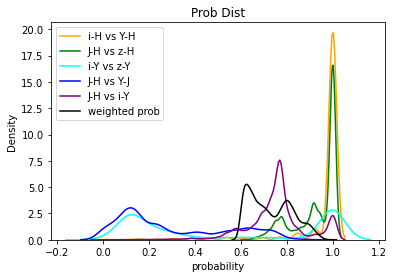

In [92]:
# the lower left part of mlt in the above plot
fp_mlt1 = fp_mlt.copy()
fp_mlt1['J-H'] = fp_mlt1['J_WFI_mag'] - fp_mlt1['H_WFI_mag']
fp_mlt1['Y-J'] = fp_mlt1['Y_WFI_mag'] - fp_mlt1['J_WFI_mag']
fp_mlt1 = fp_mlt1[(fp_mlt1['J-H'] < -0.5)&(fp_mlt1['Y-J'] < 0.5)]

# filter 1a, x: z - J, y: Y - H
sns.kdeplot(fp_mlt1['prob_1a'], label='Y-H vs z-J', color='red')
#plt.hist(fp_mlt1['prob_1a'], fill=False, label='Y-H vs z-J', edgecolor='red')
print('filter 1a, x: z - J, y: Y - H \n', fp_mlt1['prob_1a'].describe())

# filter 1b, x: Y - H, y: i - H
sns.kdeplot(fp_mlt1['prob_1b'], label='i-H vs Y-H', color='orange')
# plt.hist(fp_mlt1['prob_1b'], fill=False, label='i-H vs Y-H', edgecolor='orange')

# filter 1c, x: z - H, y: J - H
sns.kdeplot(fp_mlt1['prob_1c'], label='J-H vs z-H', color='green')
#plt.hist(fp_mlt1['prob_1c'], fill=False, label='J-H vs z-H', edgecolor='green')

# filter 1d, x: z - Y; y: i - Y
sns.kdeplot(fp_mlt1['prob_1d'], label='i-Y vs z-Y', color='cyan')
# plt.hist(fp_mlt1['prob_1d'], fill=False, label='i-Y vs z-Y', edgecolor='cyan')
print('filter 1d, x: z - Y; y: i - Y \n', fp_mlt1['prob_1d'].describe())
# filter 1e, x: Y - J, y: J - H
sns.kdeplot(fp_mlt1['prob_1e'], label='J-H vs Y-J', color='blue')
# plt.hist(fp_mlt1['prob_1e'], fill=False, label='J-H vs Y-J', edgecolor='blue')

# filter 1f, x: i - Y, y: J - H
sns.kdeplot(fp_mlt1['prob_1f'], label='J-H vs i-Y', color='purple')
# plt.hist(fp_mlt1['prob_1f'], fill=False, label='J-H vs i-Y', edgecolor='purple')

sns.kdeplot(fp_mlt1['weighted prob'], label='weighted prob', color='black')
# plt.hist(fp_mlt['weighted prob'], fill=False, label='weighted prob', edgecolor='black')
plt.legend()
plt.xlabel('probability')
plt.title('Prob Dist')
plt.show()

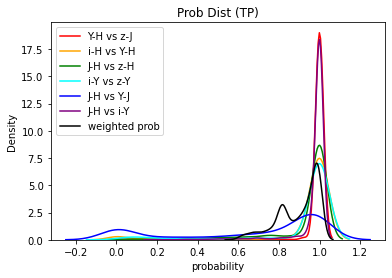

In [89]:
# filter 1a, x: z - J, y: Y - H
sns.kdeplot(tp1['prob_1a'], label='Y-H vs z-J', color='red')
# print('filter 1a, x: z - J, y: Y - H \n',  tp1['prob_1a'].describe())

# filter 1b, x: Y - H, y: i - H
sns.kdeplot(tp1['prob_1b'], label='i-H vs Y-H', color='orange')

# filter 1c, x: z - H, y: J - H
sns.kdeplot(tp1['prob_1c'], label='J-H vs z-H', color='green')

# filter 1d, x: z - Y; y: i - Y
sns.kdeplot(tp1['prob_1d'], label='i-Y vs z-Y', color='cyan')
# print('filter 1d, x: z - Y; y: i - Y \n',  tp1['prob_1d'].describe())

# filter 1e, x: Y - J, y: J - H
sns.kdeplot(tp1['prob_1e'], label='J-H vs Y-J', color='blue')

# filter 1f, x: i - Y, y: J - H
sns.kdeplot(tp1['prob_1f'], label='J-H vs i-Y', color='purple')

sns.kdeplot(tp1['weighted prob'], label='weighted prob', color='black')
plt.legend()
plt.xlabel('probability')
plt.title('Prob Dist (TP)')
plt.show()